In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline 

data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [2]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### How many UNIQUE country names and codes are there ? 

In [3]:
countries = data['CountryName'].unique().tolist()
countrycode = data['CountryCode'].unique().tolist()
print('countries = ', len(countries))
print('countrycode = ', len(countrycode))

countries =  247
countrycode =  247


### What is the range of years?

In [4]:
years = data['Year'].unique().tolist()
print(min(years), '-', max(years))

1960 - 2015


In [5]:
print(len(years)) # total years

56


### Checking for null values

In [6]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

### Select birth rate from all countries

In [7]:
# Data Selected : Birth rate
brw_stage = data[data['IndicatorName'].str.contains('Birth rate, crude \(per')] 
brw_stage.shape

(12485, 6)

In [8]:
brw_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.697888
84,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,40.017001
164,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,19.117435
236,East Asia & Pacific (all income levels),EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.362350
359,East Asia & Pacific (developing only),EAP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.635950


### Filter for USA's birth rate between 1960 and 2015

In [9]:
# Select birth rate for the World
hist_indicator = 'Birth rate, crude \(per '
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
#mask2 = data['Year'].between(2000, 2015)
mask3 = data['CountryCode'].str.contains(hist_country)

usa_stage = data[mask1 & mask3]

In [10]:
usa_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22227,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,23.7
48701,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1961,23.3
77080,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1962,22.4
105696,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1963,21.7
134734,United States,USA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1964,21.1


In [11]:
type(usa_stage)

pandas.core.frame.DataFrame

### Bar chart of yearly USA birth rate

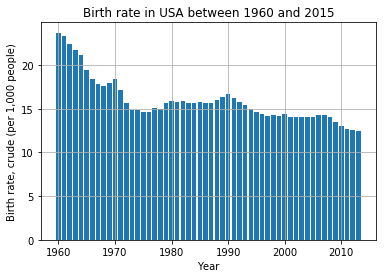

In [12]:
# get the years
years = usa_stage['Year'].values

# get the values
birth_rate = usa_stage['Value'].values

# Create plot
plt.bar(years, birth_rate)
plt.title('Birth rate in USA between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel(usa_stage['IndicatorName'].iloc[0])



plt.grid(True)
plt.show()

### Line Graph of USA birth rate annual

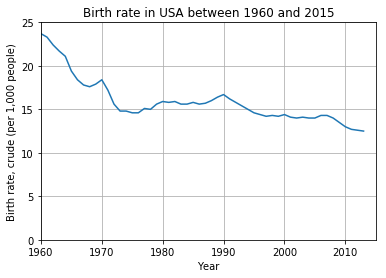

In [13]:
# Switch to a line plot
plt.plot(usa_stage['Year'].values, usa_stage['Value'].values)

# Label the axes 
plt.xlabel('Year')
plt.ylabel(usa_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('Birth rate in USA between 1960 and 2015')

# to make more honest, start the y axis at 0
plt.axis([1960, 2015, 0, 25])
plt.grid(True)
plt.show()

In [14]:
# Look at all of data
hist_data = usa_stage['Value'].values
hist_data

array([23.7, 23.3, 22.4, 21.7, 21.1, 19.4, 18.4, 17.8, 17.6, 17.9, 18.4,
       17.2, 15.6, 14.8, 14.8, 14.6, 14.6, 15.1, 15. , 15.6, 15.9, 15.8,
       15.9, 15.6, 15.6, 15.8, 15.6, 15.7, 16. , 16.4, 16.7, 16.2, 15.8,
       15.4, 15. , 14.6, 14.4, 14.2, 14.3, 14.2, 14.4, 14.1, 14. , 14.1,
       14. , 14. , 14.3, 14.3, 14. , 13.5, 13. , 12.7, 12.6, 12.5])

In [15]:
# How many of data
print(len(hist_data))

54


### Histogram of USA birth rate annual

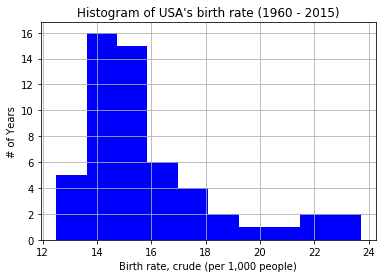

In [16]:
# Create the histogram of the data
plt.hist(usa_stage['Value'].values, color = 'blue')

# Label the axes
plt.xlabel(usa_stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')

# Label the figure
plt.title("Histogram of USA's birth rate (1960 - 2015)")


plt.grid(True)
plt.show()

So the USA has many years where it has birth rate between 13-15 per 1,000 people.

In [17]:
usa_stage['Value'].describe()

count    54.000000
mean     15.918519
std       2.579679
min      12.500000
25%      14.300000
50%      15.500000
75%      16.350000
max      23.700000
Name: Value, dtype: float64

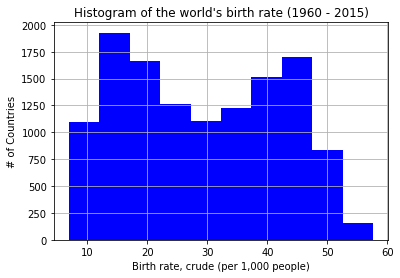

In [18]:
fig, ax = plt.subplots()
plt.hist(brw_stage['Value'].values, color = 'blue')


plt.xlabel(brw_stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of the world\'s birth rate (1960 - 2015)')

plt.grid(True)
plt.show()

In [19]:
brw_stage['Value'].describe()

count    12485.000000
mean        29.259449
std         12.939121
min          6.900000
25%         17.400000
50%         28.671000
75%         41.174000
max         57.637000
Name: Value, dtype: float64

From 1960 to 2015, the mean of USA's birth rate is 15.9, which is quite low compared to other countries.

In [20]:
# Look into the countries that has a lower birth rate
brw_stage.sort_values(by = 'Value', ascending = True)[:10]   

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3702748,"Hong Kong SAR, China",HKG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2003,6.900
3548523,"Hong Kong SAR, China",HKG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2002,7.100
3395986,"Hong Kong SAR, China",HKG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2001,7.200
3858064,"Hong Kong SAR, China",HKG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2004,7.200
2968826,Latvia,LVA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1998,7.600
3878036,"Macao SAR, China",MAC,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2004,7.688
2787335,Bulgaria,BGR,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1997,7.700
3467611,Ukraine,UKR,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2001,7.700
2831941,Latvia,LVA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1997,7.700
3722003,"Macao SAR, China",MAC,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2003,7.757


Most of them are the developed countries.

### How many countries in the list?

In [21]:
brw_stage['Value'].values

array([47.6978881 , 40.01700054, 19.11743513, ..., 32.947     ,
       40.471     , 35.715     ])

### How does the birth rate for every countries in 2012?

In [22]:
# Select birth rate for all countries in 2012
hist_indicator = 'Birth rate, crude \(per'
hist_year = 2012

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])


#apply our mask 
brw_2012 = data[mask1 & mask2]
brw_2012.head(10)
#or wirite in another way
#brw_2012.sort_values(by = 'Value', ascending = False)[:5]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5202330,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,26.917208
5202834,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,15.945389
5203313,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,9.940011
5203898,East Asia & Pacific (all income levels),EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,13.860501
5204485,East Asia & Pacific (developing only),EAP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,14.391727
5205273,Euro area,EMU,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,9.998520
5205846,Europe & Central Asia (all income levels),ECS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,12.554209
5206520,Europe & Central Asia (developing only),ECA,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,16.169430
5207397,European Union,EUU,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,10.371996
5207978,Fragile and conflict affected situations,FCS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,2012,33.916045


### Histogram of World's Birth rate in 2012

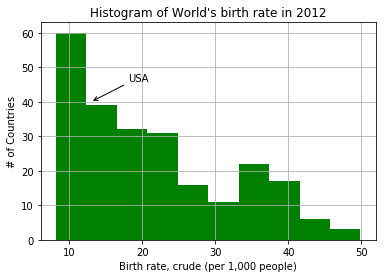

In [23]:
# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate('USA',
            xy = (13, 40), xycoords = 'data',
            xytext = (18, 46), textcoords = 'data',
            arrowprops = dict(arrowstyle = '->',
                            connectionstyle = 'arc3'),
           )
plt.hist(brw_2012['Value'], color = 'green')

plt.xlabel(brw_2012['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of World\'s birth rate in 2012')

plt.grid(True)

plt.show()

The USA, at ~13 birth rate (per 1,000 people) is in a low birth rate among all countries.

In [24]:
brw_2012['Value'].describe()

count    237.000000
mean      21.353315
std       10.371229
min        8.200000
25%       12.282000
50%       18.777000
75%       28.753000
max       49.869000
Name: Value, dtype: float64

### Relationship between GDP and birth rate in USA

In [25]:
# Select GDP per capita for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


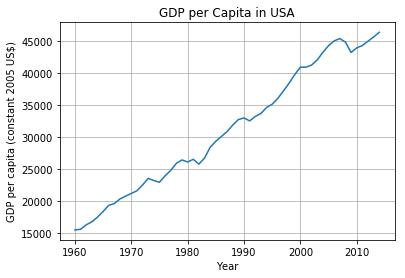

In [26]:
# Switch to the line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('GDP per Capita in USA')

plt.grid(True)
plt.show()

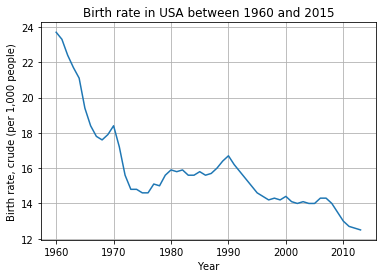

In [27]:
# Make line plot again for the USA's birth rate between 1960 and 2015
# Switch to a line plot
plt.plot(usa_stage['Year'].values, usa_stage['Value'].values)

# Label the axes 
plt.xlabel('Year')
plt.ylabel(usa_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('Birth rate in USA between 1960 and 2015')

# to make more honest, start the y axis at 0
#plt.axis([1959, 2015, 0, 25])
plt.grid(True)
plt.show()

These two charts gave us an opposite result yearly. We can explain that the economy stronger year by year in USA, which led to lower birth rate demand. This result makes sense in the developed countries. 

### 0.10 ScatterPlot for comparing GDP against birth rate (per 1,000 people)

In [28]:
print('GDP min Year :', gdp_stage['Year'].min(), 'Max :', gdp_stage['Year'].max())
print('Birth rate min Year :', usa_stage['Year'].min(), 'Max :', usa_stage['Year'].max())

GDP min Year : 1960 Max : 2014
Birth rate min Year : 1960 Max : 2013


We have 1 extra year of GDP data, so, let's trim this off so the scatterplot has equal length arrays to compare.

In [29]:
# To do the trimming, let's ask for the year before 2014
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2014]

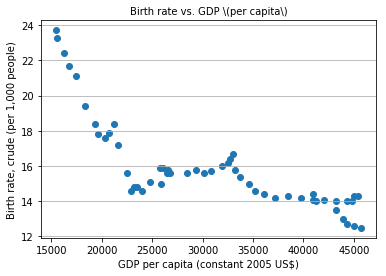

In [30]:
fig, axis = plt.subplots()

axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel(usa_stage['IndicatorName'].iloc[0], fontsize = 10)
axis.set_title('Birth rate vs. GDP \(per capita\)', fontsize = 10)

# grid open only for y-axis
axis.yaxis.grid(True)

X = gdp_stage_trunc['Value']
Y = usa_stage['Value']

axis.scatter(X, Y)

plt.show()

### 0.11 Correlation between bith rate and GDP 

In [31]:
np.corrcoef(gdp_stage_trunc['Value'], usa_stage['Value'])

array([[ 1.        , -0.79974891],
       [-0.79974891,  1.        ]])

**This is an important factor that influencing birth rate in the USA.**<br>